<h2>Neccessary Imports</h2>

In [14]:
# Necessary imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn import for data pre-processing
from sklearn.preprocessing import LabelEncoder

<h2>Loading Dataset into DataFrame</h2>

In [2]:
# Making use of pandas library to read the csv file. 
linear_regression_dataframe = pd.read_csv("Student_Performance.csv", delimiter=',')

<h2>Investigating Data within Data Frame</h2>

In [3]:
# Printing the first five rows of the dataset. 
linear_regression_dataframe.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
# Printing the last five rows of the dataset. 
linear_regression_dataframe.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [5]:
# Checking the total nulls within each column of the data frame. 
linear_regression_dataframe.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [10]:
# Printing the amount of rows for each column. 
print(linear_regression_dataframe.count())

Hours Studied                       10000
Previous Scores                     10000
Extracurricular Activities          10000
Sleep Hours                         10000
Sample Question Papers Practiced    10000
Performance Index                   10000
dtype: int64


In [12]:
# Displaying the data type of each column. 
linear_regression_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [16]:
# Creating an instance of the LabelEncoder library. 
label_encoder = LabelEncoder()

# Used label encoder to transform categorical entries into numerical values. 
encoded_categorical_labels = label_encoder.fit_transform(linear_regression_dataframe['Extracurricular Activities'])

# Print the lable encoded vlaues.
print(encoded_categorical_labels)

[1 0 1 ... 1 1 0]


In [17]:
# Droping the categorical 'Extracurricular Activities' column.
linear_regression_dataframe.drop("Extracurricular Activities", axis=1, inplace=True)

# Appending the label encoded array to the 'Extracurricular Activities' column in the dataset. 
linear_regression_dataframe['Extracurricular Activities'] = encoded_categorical_labels

# Displaying the first five rows of the 
linear_regression_dataframe.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


In [19]:
# Displaying a simple correlation matrix
linear_regression_dataframe.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730,0.003873
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189,0.008369
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106,-0.023284
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268,0.013103
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000,0.024525
Extracurricular Activities,0.003873,0.008369,-0.023284,0.013103,0.024525,1.000000


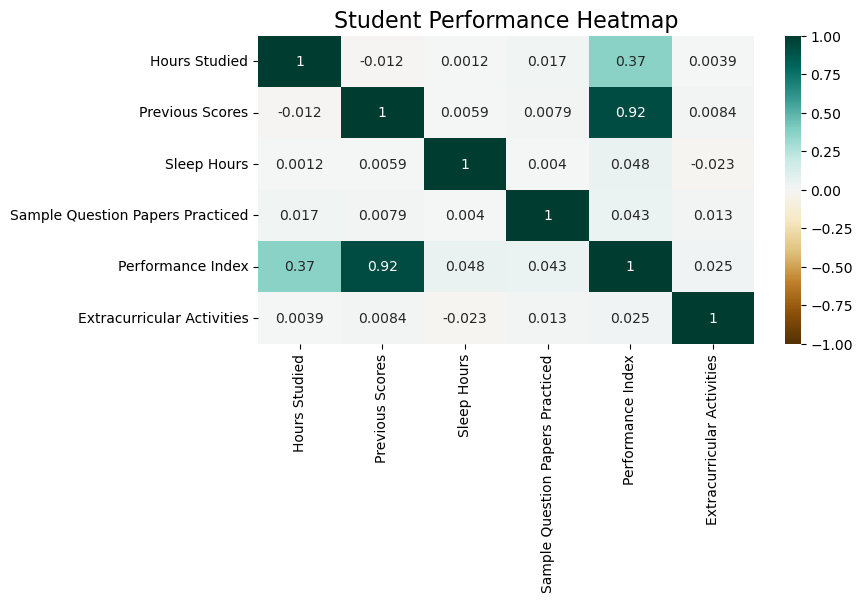

In [26]:
# Creating a heatmap figure.
# Setting the size of the figure.
plt.figure(figsize=(8, 4))

# Intializing a headmap variable, passing the correlated linear regression data frame. 
# Setting the minimum and maximum ranges of the heatmap.
# Setting annot to 'True' to make the correlation values visable. 
# Setting the heatmap style to 'BrBG'.
dataframe_heatmap = sns.heatmap(linear_regression_dataframe.corr(), 
                                vmin=-1, vmax=1, 
                                annot=True, cmap='BrBG')

# Adding a title to the heatmap figure. 
plt.title('Student Performance Heatmap', fontdict={'fontsize':16})

# Displaying the heatmap figure. 
plt.show()